In [ ]:
!pip install numpy
!pip install pandas
!pip install seaborn

In [ ]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [ ]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix');
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])
    plt.show()

In [ ]:
# Upload your CSV from local
from google.colab import files
uploaded = files.upload()

# Load it into a DataFrame
df = pd.read_csv("xy.csv")  # replace with actual filename
df.head()


Saving ZADNJEnie .csv to ZADNJEnie  (2).csv


,250.2,618.4,298.2,141.2,9.2,219.7,80.3,10,592,593,...,379.1_binary,2124.1_missing_all,2124.1_1.0,2124.1_2.0,2124.1_3.0,2124.1_4.0,2124.1_5.0,207_missing_all,207_1.0,207_2.0
0,3,2,2,2,2,2,2,3,4,4,...,1,1,0,0,0,0,0,0,1,0
1,2,1,2,2,2,1,2,2,1,2,...,1,1,0,0,0,0,0,0,0,1
2,3,2,3,3,4,2,2,3,2,3,...,1,1,0,0,0,0,0,0,1,0
3,4,4,4,2,4,5,5,4,2,4,...,0,1,0,0,0,0,0,0,1,0
4,2,1,1,3,2,2,2,2,2,2,...,1,1,0,0,0,0,0,0,1,0


In [ ]:
# ─────────── STEP 1: Define exclusions ───────────
question_groups_to_exclude = ['']
manually_excluded = [col for col in df.columns if any(col == q or col.startswith(f"{q}A") for q in question_groups_to_exclude)]
missing_flags = [c for c in df.columns if '_missing' in c]
excluded_columns = set(manually_excluded + missing_flags)

# ─────────── STEP 2: Identify columns to standardize ───────────
# Include columns with >2 unique values or known ordinal 2-value columns
force_standardize = ['']  # Add more ordinal columns with 2 values as needed

columns_to_standardize = [
    c for c in df.columns
    if c not in excluded_columns and (df[c].nunique() > 2 or c in force_standardize)
]

# ─────────── STEP 3: Flip scale direction if needed ───────────
always_normal_direction = ['']  # Add known "positive-direction" columns here if needed

df_proc = df.copy()
cols_to_flip = []

for c in columns_to_standardize:
    if c in always_normal_direction:
        continue
    try:
        df_proc[c] = pd.to_numeric(df_proc[c], errors='coerce')
        col_min, col_max = df_proc[c].min(), df_proc[c].max()
        df_proc[c] = col_max + col_min - df_proc[c]
        cols_to_flip.append(c)
    except:
        print(f"⚠️ Skipping flip: {c} contains non-numeric values")

# ─────────── STEP 4: Ensure all columns are numeric ───────────
for col in columns_to_standardize:
    df_proc[col] = pd.to_numeric(df_proc[col], errors='coerce')

# ─────────── STEP 5: Impute missing values ───────────
imputer = SimpleImputer(strategy="median")
df_proc[columns_to_standardize] = imputer.fit_transform(df_proc[columns_to_standardize])

# ─────────── STEP 6: Standardize features ───────────
scaler = StandardScaler()
df_proc[columns_to_standardize] = scaler.fit_transform(df_proc[columns_to_standardize])

# ─────────── STEP 7: Prepare model inputs ───────────
df_proc.to_csv("standardized_selected_columns.csv", index=False)

X = df.drop(columns=[''])              # original, for reference
X_scaled = df_proc.drop(columns=[''])  # scaled version for modeling
Y = df[''].astype(int).to_numpy()      # target column

X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.2, random_state=2
)

In [ ]:
Y = df[''].to_numpy()


In [ ]:
X_scaled = df_proc.drop(columns=[''])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=2)


In [ ]:
Y_test.shape


(13,)

In [ ]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [ ]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
logreg_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=10)


# Step 4: Fit the GridSearchCV object to the training data
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [ ]:
print("\n★ Logistic Regression")
print("    best params  :", logreg_cv.best_params_)
print(f"    CV accuracy  : {logreg_cv.best_score_:.3f}")
print(f"    TEST accuracy: {logreg_cv.score(X_test, Y_test):.3f}")

# Predict on test set
Y_pred = logreg_cv.predict(X_test)



★ Logistic Regression
    best params  : {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
    CV accuracy  : 0.800
    TEST accuracy: 0.846


,β
2124.1_missing_all,0.890287
97.10,0.611863
2223,0.510411
298.2,0.495107
532,0.477249
...,...
2694,0.019209
1727,0.013480
2095,-0.011516
595.4,0.009450


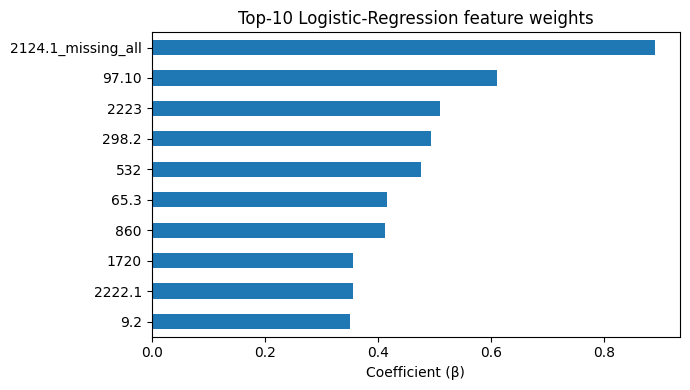

In [ ]:
best_lr = logreg_cv.best_estimator_
coef = pd.Series(best_lr.coef_[0], index=X.columns, name="β") \
          .sort_values(key=lambda s: s.abs(), ascending=False)

display(coef.to_frame())        # full table

(
    coef.head(10)
        .sort_values()          # order for tidy barh
        .plot(kind="barh", figsize=(7, 4))
)
plt.title("Top-10 Logistic-Regression feature weights")
plt.xlabel("Coefficient (β)")
plt.tight_layout()
plt.show()


🔍 Average Absolute Contribution of Each Feature:



,Average Impact
2124.1_missing_all,0.593525
97.10,0.428877
298.2,0.419835
2223,0.413087
532,0.367834
...,...
2095,0.009204
207_missing_all,0.007623
2700,0.006657
595.4,0.006332


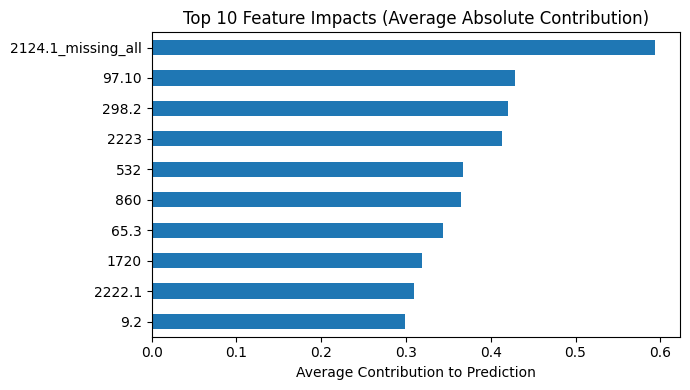

In [ ]:

# Get the best model from GridSearchCV
best_lr = logreg_cv.best_estimator_

# Get coefficients (β values)
coefs = best_lr.coef_[0]  # shape: (n_features,)

# Multiply each feature value by its corresponding coefficient
# This gives the contribution of each feature per row
contributions = X_scaled * coefs  # shape: (n_samples, n_features)

# Take the mean of absolute contributions across all rows
average_absolute_impact = np.abs(contributions).mean(axis=0)

# Create a Pandas Series with feature names
impact_series = pd.Series(average_absolute_impact, index=X.columns)

# Sort by most impactful features
impact_series = impact_series.sort_values(ascending=False)

# Show results
print("\n🔍 Average Absolute Contribution of Each Feature:\n")
display(impact_series.to_frame(name="Average Impact"))

# Optional: plot the top 10 features
impact_series.head(10).sort_values().plot(kind="barh", figsize=(7, 4))
plt.title("Top 10 Feature Impacts (Average Absolute Contribution)")
plt.xlabel("Average Contribution to Prediction")
plt.tight_layout()
plt.show()

